This notebook tests the functions to fit outliers in histograms and then the residuals from interpolation.

In [84]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize']=[8,6]

In [33]:
import sys
sys.path.append('/Users/shenglanqiao/Documents/Research/dna_data/src')

import dnaAnalysis as da
import h5py
import numpy as np

In [42]:
reload(da)

<module 'dnaAnalysis' from '/Users/shenglanqiao/Documents/Research/dna_data/src/dnaAnalysis.py'>

In [115]:
# open some data file
data_file=h5py.File('/Users/shenglanqiao/Documents/\
Research/dna_data/data/run296314_NiUxvV_corr.hdf5', "r")

In [116]:
# load some data for testing
trial=data_file['dif_cors'][:,200]
data_file.close()

In [117]:
# make two histograms for outliers and central values
bc,nc,bs,ns=da.make_histograms(trial,2.5)

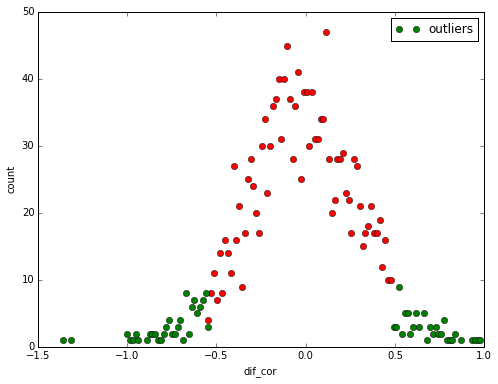

In [118]:
# plot histograms
plt.plot(bc[:-1][nc>0],nc[nc>0],'ro')
plt.plot(bs[:-1][ns>0],ns[ns>0],'go',label='outliers')
plt.legend()
plt.xlabel('dif_cor')
plt.ylabel('count')

In [119]:
# fit to two gaussians
coefs = da.train(trial,2.5)

(0, 45)

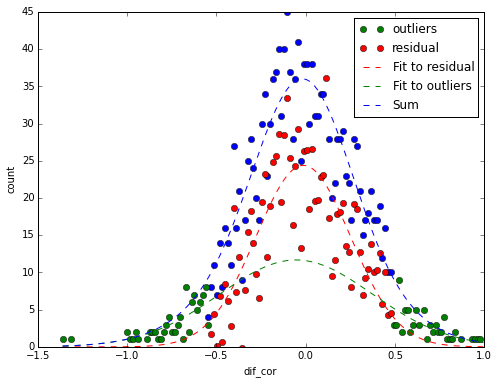

In [120]:
#plot results
all_points=np.float(np.sum(nc)+np.sum(ns))

plt.plot(bc[:-1][nc>0],nc[nc>0],'bo')
plt.plot(bs[:-1][ns>0],ns[ns>0],'go',label='outliers')


plt.xlabel('dif_cor')
plt.ylabel('count')

g1=da.gaussian(bc,*coefs[0])
g2=da.gaussian(bc,*coefs[1])
plt.plot(bs[:-1][nc>0],nc[nc>0]-g2[nc>0],'ro',label='residual')

plt.plot(bc,g1,'r--',label='Fit to residual')
plt.plot(bc,g2,'g--',label='Fit to outliers')
plt.plot(bc,g2+g1,'b--',label='Sum')

plt.legend(loc='upper right')
plt.ylim(0,45)

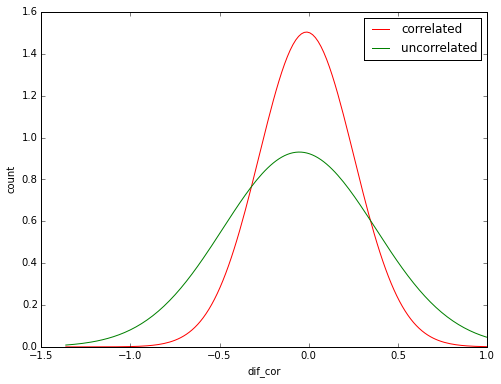

In [121]:
# plot normalized distributions
n1=da.normal(bc,coefs[0][0],coefs[0][1])
n2=da.normal(bc,coefs[1][0],coefs[1][1])
plt.plot(bc,n1,'r-',label='correlated')
plt.plot(bc,n2,'g-',label='uncorrelated')

plt.legend(loc='upper right')
plt.xlabel('dif_cor')
plt.ylabel('count')


In [122]:
# check that the normal distribution intrgrates to one

print np.sum(n1*(bc[1]-bc[0]))
print np.sum(n2*(bc[1]-bc[0]))

0.999936342775
0.992081795778
